___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Session - 2<br><br>Installing Tensorflow & Keras Syntax Basics<br><br>Fake Reg<br><h1>

# Installing Tensorflow

In [1]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [3]:
import tensorflow as tf
tf.__version__
# Google, TensorFlow'u sürekli olarak güncelleştirir ve yeni versionlar yayınlar.

'2.12.0'

# Keras Syntax Basics

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (8,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [4]:
# from google.colab import drive
# drive.mount('/content/drive')

In [5]:
# df = pd.read_csv("/content/drive/MyDrive/fake_reg.csv")

In [5]:
df = pd.read_csv("fake_reg.csv")

## Exploratory Data Analysis and Visualization

In [6]:
df.head()

,price,feature1,feature2
0,461.528,999.788,999.766
1,548.130,998.862,1001.042
2,410.297,1000.070,998.844
3,540.382,999.952,1000.441
4,546.025,1000.446,1000.339


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   price     1000 non-null   float64
 1   feature1  1000 non-null   float64
 2   feature2  1000 non-null   float64
dtypes: float64(3)
memory usage: 23.6 KB


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,1000.000,498.673,93.785,223.347,433.026,502.382,564.922,774.408
feature1,1000.000,1000.014,0.974,997.058,999.332,1000.010,1000.638,1003.208
feature2,1000.000,999.980,0.948,996.996,999.316,1000.002,1000.645,1002.666


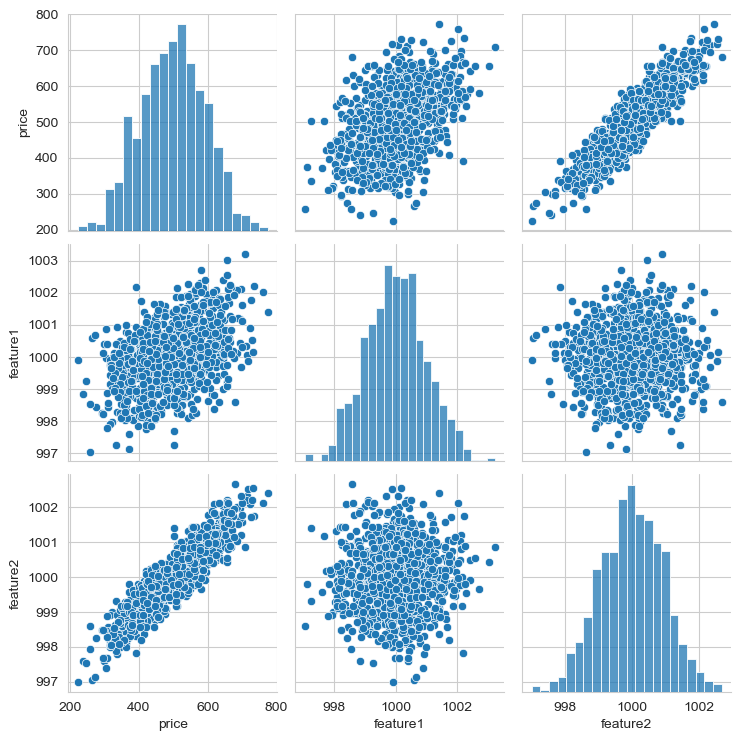

In [9]:
sns.pairplot(df);

In [10]:
df.corr()

,price,feature1,feature2
price,1.000,0.444,0.908
feature1,0.444,1.000,0.031
feature2,0.908,0.031,1.000


## Preprocessing of Data
- Train | Test Split, Scalling

In [11]:
from sklearn.model_selection import train_test_split

In [13]:
# X = df[['feature1', 'feature2']].values  # converts to array (if you don't scale dataset create X and y like this)
# y = df['price'].values            

# DL'de datayı modele sokarken datamızı array'e ya da tensörlere çevirmeliyiz.

In [12]:
X = df[['feature1', 'feature2']]
y = df['price']

In [13]:
X

,feature1,feature2
0,999.788,999.766
1,998.862,1001.042
2,1000.070,998.844
3,999.952,1000.441
4,1000.446,1000.339
...,...,...
995,1000.019,999.673
996,998.855,1000.020
997,1001.452,998.848
998,1000.771,998.563


In [14]:
y

0     461.528
1     548.130
2     410.297
3     540.382
4     546.025
        ...  
995   476.526
996   457.313
997   456.721
998   403.316
999   599.367
Name: price, Length: 1000, dtype: float64

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [1]:
X_train.shape

NameError: name 'X_train' is not defined

In [17]:
X_test.shape

(300, 2)

In [18]:
from sklearn.preprocessing import MinMaxScaler

# Arka planda Gradient Descent olduğu için scale'e ihtiyaç duyuyoruz. 
# DL'de genelde MinMaxScaler daha iyi sonuçlar veriyor.

In [19]:
scaler = MinMaxScaler()

In [20]:
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Modelling

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input,Dense

In [24]:
# help(Sequential)

# Sequential ; modelimiz ard arda dizilmiş katmanlardan oluşacaksa Sequential modeller kullanacağız.

In [25]:
#help(Dense)

# Dense ;  fully connected bir yapı istiyorsam ben dense layer kullanacağım.

In [22]:
X_train.shape

(700, 2)

In [23]:
# First way to create model

model = Sequential(
    [
                    Input(shape = X_train.shape[1]),
                    Dense(units = 4, activation = "relu"),            
                    Dense(units = 4, activation = "relu"),
                    Dense(units = 4, activation = "relu"),
                    Dense(units = 1)
    ]
)

In [24]:
# Second way to create model (recommended)


model = Sequential()    


#model.add(Input(shape = X_train.shape[1])) #alternative way

model.add(Dense(units = 4, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(units = 4, activation = "relu"))
model.add(Dense(units = 4, activation = "relu"))
model.add(Dense(units = 1))


# Dense layer diyerek  eklenen layer'ın  fully connected bir layer olacağını  belirtiyoruz.
# son katmanda elimizde bir regresyon problemi olduğundan 1 nöron olmalı ve Aktivasyon fonksiyonunun defaultu ,
# None olduğu için tekrardan yazmadık.
# hidden layer sayısı nöron sayısı tamamen bize kalmış.
# Okunurluğu daha güzel olduğu için bunu kullanacağız.

In [49]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 4)                 12        
                                                                 
 dense_5 (Dense)             (None, 4)                 20        
                                                                 
 dense_6 (Dense)             (None, 4)                 20        
                                                                 
 dense_7 (Dense)             (None, 1)                 5         
                                                                 
Total params: 57
Trainable params: 57
Non-trainable params: 0
_________________________________________________________________


In [50]:
model.weights

# ilk atanan weight'leri bize veriyor ( random olarak atanıyor )

[<tf.Variable 'dense_4/kernel:0' shape=(2, 4) dtype=float32, numpy=
 array([[ 2.6385055 ,  0.16783619, -0.44834924,  0.15390116],
        [ 5.35944   , -0.57945746, -0.39117265,  0.1660752 ]],
       dtype=float32)>,
 <tf.Variable 'dense_4/bias:0' shape=(4,) dtype=float32, numpy=array([ 0.966099  , -0.09475084,  0.        , -0.28042126], dtype=float32)>,
 <tf.Variable 'dense_5/kernel:0' shape=(4, 4) dtype=float32, numpy=
 array([[ 3.8762767 , -0.05411008, -0.7206909 , -0.64439595],
        [-0.47378677,  0.66824085, -0.79541   , -0.14199781],
        [ 0.5872397 , -0.5859478 ,  0.43772942,  0.23009235],
        [-0.43251702, -0.24704875,  0.67623615, -0.2323016 ]],
       dtype=float32)>,
 <tf.Variable 'dense_5/bias:0' shape=(4,) dtype=float32, numpy=array([ 0.9507472 , -0.1094389 , -0.11146402,  0.        ], dtype=float32)>,
 <tf.Variable 'dense_6/kernel:0' shape=(4, 4) dtype=float32, numpy=
 array([[-0.49228242,  3.5603325 , -0.0653587 ,  2.7799373 ],
        [ 0.3188917 , -0.4052766

### Choosing an optimizer and loss

Keep in mind what kind of problem you are trying to solve:

            # For a multi-class classification problem
            model.compile(optimizer='rmsprop',
                          loss='categorical_crossentropy',
                          metrics=['accuracy'])

            # For a binary classification problem
            model.compile(optimizer='rmsprop',
                          loss='binary_crossentropy',
                          metrics=['accuracy'])

            # For a mean squared error regression problem
            model.compile(optimizer='rmsprop',
                          loss='mse')

In [51]:
model.compile(optimizer = "rmsprop", loss = "mse")

# regresyon  problemi olduğu için loss fonksiyonumuza mse yazdık.optimizasyon algoritması olarak rmsprop seçtik ; 
# diğer optimizasyon algoritmaları da kullanabilirdi.

In [52]:
model.fit(x = X_train, y = y_train, batch_size = 32, epochs = 250)

Epoch 1/250
22/22 [==============================] - 1s 3ms/step - loss: 24.0259
Epoch 2/250
22/22 [==============================] - 0s 2ms/step - loss: 24.1115
Epoch 3/250
22/22 [==============================] - 0s 2ms/step - loss: 24.2486
Epoch 4/250
22/22 [==============================] - 0s 3ms/step - loss: 24.1815
Epoch 5/250
22/22 [==============================] - 0s 3ms/step - loss: 23.8887
Epoch 6/250
22/22 [==============================] - 0s 3ms/step - loss: 24.1166
Epoch 7/250
22/22 [==============================] - 0s 3ms/step - loss: 23.9200
Epoch 8/250
22/22 [==============================] - 0s 3ms/step - loss: 24.4008
Epoch 9/250
22/22 [==============================] - 0s 3ms/step - loss: 24.0816
Epoch 10/250
22/22 [==============================] - 0s 3ms/step - loss: 23.9489
Epoch 11/250
22/22 [==============================] - 0s 3ms/step - loss: 24.0382
Epoch 12/250
22/22 [==============================] - 0s 3ms/step - loss: 24.2726
Epoch 13/250
22/22 [=====

22/22 [==============================] - 0s 3ms/step - loss: 24.1320
Epoch 102/250
22/22 [==============================] - 0s 3ms/step - loss: 23.9840
Epoch 103/250
22/22 [==============================] - 0s 3ms/step - loss: 24.1922
Epoch 104/250
22/22 [==============================] - 0s 3ms/step - loss: 23.9410
Epoch 105/250
22/22 [==============================] - 0s 3ms/step - loss: 23.9489
Epoch 106/250
22/22 [==============================] - 0s 3ms/step - loss: 24.2687
Epoch 107/250
22/22 [==============================] - 0s 2ms/step - loss: 24.0174
Epoch 108/250
22/22 [==============================] - 0s 3ms/step - loss: 24.3244
Epoch 109/250
22/22 [==============================] - 0s 3ms/step - loss: 24.0244
Epoch 110/250
22/22 [==============================] - 0s 3ms/step - loss: 23.9391
Epoch 111/250
22/22 [==============================] - 0s 2ms/step - loss: 24.0112
Epoch 112/250
22/22 [==============================] - 0s 2ms/step - loss: 24.1978
Epoch 113/250
22/2

In [53]:
model.weights
# random olarak atanan weight'lerin değiştiğini görebiliriz.

[<tf.Variable 'dense_4/kernel:0' shape=(2, 4) dtype=float32, numpy=
 array([[ 2.6367433 ,  0.16783619, -0.44834924,  0.15390116],
        [ 5.3575106 , -0.57945746, -0.39117265,  0.1660752 ]],
       dtype=float32)>,
 <tf.Variable 'dense_4/bias:0' shape=(4,) dtype=float32, numpy=array([ 0.96506214, -0.09475084,  0.        , -0.28042126], dtype=float32)>,
 <tf.Variable 'dense_5/kernel:0' shape=(4, 4) dtype=float32, numpy=
 array([[ 3.874384  , -0.05411008, -0.7206909 , -0.64439595],
        [-0.47378677,  0.66824085, -0.79541   , -0.14199781],
        [ 0.5872397 , -0.5859478 ,  0.43772942,  0.23009235],
        [-0.43251702, -0.24704875,  0.67623615, -0.2323016 ]],
       dtype=float32)>,
 <tf.Variable 'dense_5/bias:0' shape=(4,) dtype=float32, numpy=array([ 0.9502174 , -0.1094389 , -0.11146402,  0.        ], dtype=float32)>,
 <tf.Variable 'dense_6/kernel:0' shape=(4, 4) dtype=float32, numpy=
 array([[-0.49228242,  3.5585747 , -0.0653587 ,  2.7781239 ],
        [ 0.3188917 , -0.4052766

In [54]:
model.history.history

{'loss': [24.025943756103516,
  24.111509323120117,
  24.248559951782227,
  24.18153953552246,
  23.888715744018555,
  24.116628646850586,
  23.9200496673584,
  24.40082550048828,
  24.08155632019043,
  23.948928833007812,
  24.038188934326172,
  24.27257537841797,
  24.076377868652344,
  23.953262329101562,
  24.066617965698242,
  24.066062927246094,
  23.941631317138672,
  24.16575050354004,
  24.15852928161621,
  24.089609146118164,
  24.016338348388672,
  24.061443328857422,
  23.933956146240234,
  24.212329864501953,
  24.16315269470215,
  24.007349014282227,
  24.08685302734375,
  23.91222381591797,
  24.011688232421875,
  23.96139144897461,
  24.21457862854004,
  24.099355697631836,
  24.16252326965332,
  24.239355087280273,
  24.11377716064453,
  24.135345458984375,
  23.871919631958008,
  24.093658447265625,
  23.935258865356445,
  24.172454833984375,
  23.986026763916016,
  23.901390075683594,
  24.070613861083984,
  24.264188766479492,
  23.95264434814453,
  24.0655937194824

In [55]:
pd.DataFrame(model.history.history)

,loss
0,24.026
1,24.112
2,24.249
3,24.182
4,23.889
...,...
245,24.057
246,23.940
247,24.172
248,24.187


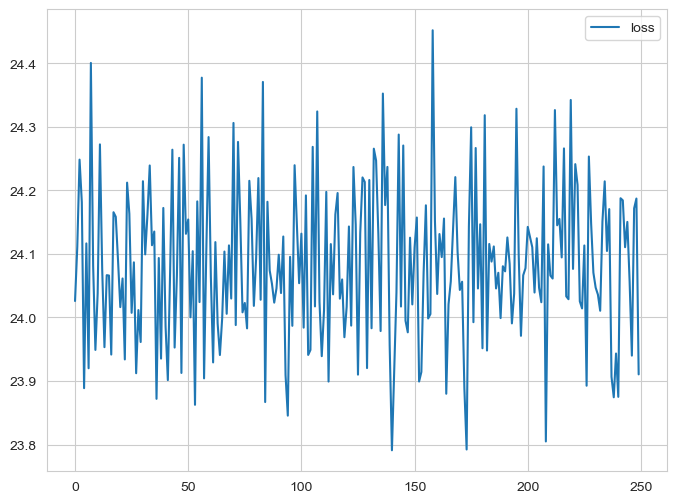

In [56]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();

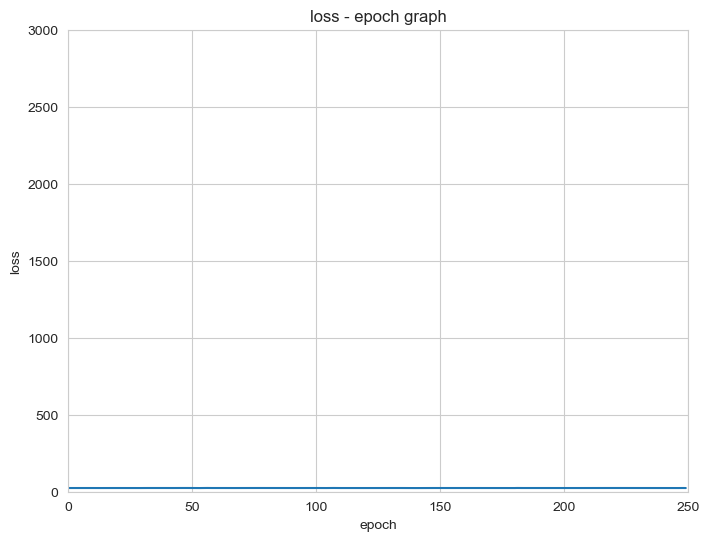

In [57]:
fig, ax= plt.subplots()
ax.plot(loss_df)
ax.set_xlabel("epoch")
ax.set_ylabel("loss")
ax.set_title("loss - epoch graph")
ax.set_xlim([0, 250]) # focusing on the given x values
ax.set_ylim([0, 3000]); # focusing on the given y values 

## Model Performance

In [58]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [59]:
model.evaluate(X_train, y_train, verbose=0)

# compile satırında loss parameteresinin karşısınıa ne yazarsak onun skoru/skorları döner.
# model.evaluate arka planda burada predict yapıyor.

23.760814666748047

In [60]:
model.evaluate(X_test, y_test, verbose=0)

25.335941314697266

In [61]:
# şu şekilde de yapabiliriz : 

In [62]:
y_pred = model.predict(X_test)

10/10 [==============================] - 0s 2ms/step


In [63]:
y_pred.shape

(300, 1)

In [64]:
y_test.shape

(300,)

In [65]:
my_dict = {"Actual" : y_test, "Pred" : y_pred.reshape(-1,)}   # y_pred'in sonucu 2 boyutlu bir aray
compare = pd.DataFrame(my_dict)
compare.sample(10)

,Actual,Pred
924,664.509,669.722
65,547.276,551.560
519,553.905,552.184
436,610.297,609.089
211,504.694,499.793
261,531.662,542.465
344,325.795,327.427
599,475.947,480.937
868,320.228,314.270
82,462.005,466.372


In [66]:
def eval_metric(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = mean_squared_error(actual, pred,squared=False)
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\nmae:", mae, "\nmse:", mse, "\nrmse:", rmse)

In [67]:
eval_metric(y_test, y_pred)

r2_score: 0.9971183062791557 
mae: 4.047862724639344 
mse: 25.335942443684218 
rmse: 5.033482139005185


## Final Model and Model Deployment

### Final Model Training

In [68]:
scaler = MinMaxScaler().fit(X)

In [69]:
import pickle
pickle.dump(scaler, open("scaler_fake_reg", 'wb'))

In [70]:
X_scaled = scaler.transform(X)
X_scaled

array([[0.44380388, 0.4885581 ],
       [0.29323398, 0.71363026],
       [0.48977598, 0.32595231],
       ...,
       [0.7144056 , 0.32658556],
       [0.60372768, 0.27637009],
       [0.35350286, 0.78575664]])

In [72]:
final_model = Sequential()

final_model.add(Dense(units = 4, activation = "relu"))     # input_dim = 2 or input_dim = X_train.shape[1]
final_model.add(Dense(units = 4, activation = "relu"))
final_model.add(Dense(units = 4, activation = "relu"))
final_model.add(Dense(1))

final_model.compile(optimizer = "rmsprop", loss = "mse")

In [73]:
#model.summary()

In [74]:
#final_model.weights

In [75]:
final_model.fit(x = X_scaled, y = y, batch_size = 32, epochs = 250)

#input_dim = 2 or input_dim = X_train.shape[1] yazmamamıza rağmen model.fit kısmında 2 feature olduğunu algoritma anlıyor.
# yazmazsak ama fit etmeden model.summary()'i çalıştırdığımızda hata alırız .

Epoch 1/250
32/32 [==============================] - 1s 2ms/step - loss: 257400.0938
Epoch 2/250
32/32 [==============================] - 0s 2ms/step - loss: 257281.2969
Epoch 3/250
32/32 [==============================] - 0s 3ms/step - loss: 257126.8281
Epoch 4/250
32/32 [==============================] - 0s 2ms/step - loss: 256929.3750
Epoch 5/250
32/32 [==============================] - 0s 3ms/step - loss: 256683.7656
Epoch 6/250
32/32 [==============================] - 0s 3ms/step - loss: 256384.3125
Epoch 7/250
32/32 [==============================] - 0s 3ms/step - loss: 256026.2188
Epoch 8/250
32/32 [==============================] - 0s 3ms/step - loss: 255602.3438
Epoch 9/250
32/32 [==============================] - 0s 3ms/step - loss: 255105.7812
Epoch 10/250
32/32 [==============================] - 0s 3ms/step - loss: 254524.8906
Epoch 11/250
32/32 [==============================] - 0s 3ms/step - loss: 253845.9844
Epoch 12/250
32/32 [==============================] - 0s 3ms/st

32/32 [==============================] - 0s 2ms/step - loss: 24.7178
Epoch 196/250
32/32 [==============================] - 0s 2ms/step - loss: 24.6507
Epoch 197/250
32/32 [==============================] - 0s 3ms/step - loss: 24.6193
Epoch 198/250
32/32 [==============================] - 0s 2ms/step - loss: 24.7886
Epoch 199/250
32/32 [==============================] - 0s 3ms/step - loss: 24.8229
Epoch 200/250
32/32 [==============================] - 0s 2ms/step - loss: 24.8155
Epoch 201/250
32/32 [==============================] - 0s 3ms/step - loss: 24.7233
Epoch 202/250
32/32 [==============================] - 0s 3ms/step - loss: 24.7559
Epoch 203/250
32/32 [==============================] - 0s 3ms/step - loss: 24.5621
Epoch 204/250
32/32 [==============================] - 0s 3ms/step - loss: 24.7585
Epoch 205/250
32/32 [==============================] - 0s 3ms/step - loss: 24.4627
Epoch 206/250
32/32 [==============================] - 0s 3ms/step - loss: 24.5396
Epoch 207/250
32/3

### Saving a Model

You can save a TensorFlow/Keras model using [`model.save()`](https://www.tensorflow.org/tutorials/keras/save_and_load#save_the_entire_model).

Keras saves models by inspecting their architectures. This technique saves everything:

- The weight values
- The model's architecture
- The model's training configuration (what you pass to the .compile() method)
- The optimizer and its state, if any (this enables you to restart training where you left off)


There are two ways to save a model in TensorFlow:
1. The [SavedModel format](https://www.tensorflow.org/tutorials/keras/save_and_load#savedmodel_format) (default).
2. The [HDF5 format](https://www.tensorflow.org/tutorials/keras/save_and_load#hdf5_format).

The main difference between the two is the SavedModel is automatically able to save custom objects (such as special layers) without additional modifications when loading the model back in.

The key difference between HDF5 and SavedModel is that HDF5 uses object configs to save the model architecture, while SavedModel saves the execution graph. Thus, SavedModels are able to save custom objects like subclassed models and custom layers without requiring the original code.

In [76]:
final_model.save('model_fake_reg.h5')  # creates a HDF5 file 'my_model.h5'

In [56]:
#final_model.save("model_fake_reg") 

### Loading Model

In [80]:
from tensorflow.keras.models import load_model

In [81]:
model_fake_reg = load_model('model_fake_reg.h5')

In [82]:
scaler_fake_reg = pickle.load(open("scaler_fake_reg", "rb"))

## Prediction-1

In [83]:
sample = [[998, 1000]]

In [84]:
sample_scaled = scaler_fake_reg.transform(sample)
sample_scaled

array([[0.15312457, 0.52980619]])

In [85]:
model_fake_reg.predict(sample_scaled)

1/1 [==============================] - 0s 140ms/step


array([[421.2754]], dtype=float32)

## Prediction-2

In [86]:
my_dict = {"feature1": [997, 998, 999, 1000, 1001],
           "feature2": [1000, 999, 998, 997, 996]}

In [87]:
sample = pd.DataFrame(my_dict)
sample

,feature1,feature2
0,997,1000
1,998,999
2,999,998
3,1000,997
4,1001,996


In [88]:
sample_scaled = scaler_fake_reg.transform(sample)
sample_scaled

array([[-0.00948799,  0.52980619],
       [ 0.15312457,  0.35345977],
       [ 0.31573713,  0.17711336],
       [ 0.47834969,  0.00076694],
       [ 0.64096225, -0.17557948]])

In [89]:
model_fake_reg.predict(sample_scaled)

1/1 [==============================] - 0s 19ms/step


array([[380.97272],
       [332.48865],
       [284.00455],
       [235.52045],
       [187.03635]], dtype=float32)

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___